<a href="https://colab.research.google.com/github/xRoXX-coll/Project-Python/blob/main/project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Сегментация клиентской базы телекоммуникационной компании

**Аналитическая задача** — провести анализ данных с целью выделения наиболее типичных групп клиентов и разработки предложений для каждой из групп.

## Описание данных
Каждый клиент описывается следующим набором признаков:
- `Возраст`, `Среднемесячный расход`, `Средняя продолжительность разговоров`, `Звонков днем за месяц`, `Звонков вечером за месяц`, `Звонков ночью за месяц`, `Звонки в другие города`, `Звонки в другие страны`, `Доля звонков на стационарные телефоны`, `Количество SMS за месяц`, `Дата подключения тарифа`.

## Примерный план по выполнению проекта

**Шаг 1.** Загрузка данных;

**Шаг 2.** Первичная обработка данных (при необходимости):
- скорректировать заголовки;
- скорректировать типы признаков;
- проверить наличие дублирующихся записей;
- проверить наличие аномальных значений;
- восстановить пропущенные значения;

**Шаг 3.** Добавление новых переменных:
- по значениям признака `Возраст` введите новую переменную `Возрастная категория`, принимающую значения "студент", "аспирант", "бизнесмен" и "знаток" по следующую правилу:

$$
\text{Возрастная категория} =
\left\{
\begin{array}{l}
\text{студент,} \quad \text{если Возраст } \in [19, 24];\\  
\text{аспирант,} \quad \text{если Возраст } \in [25, 33];\\
\text{бизнесмен,} \quad \text{если Возраст } \in [34, 56];\\
\text{знаток,} \quad \text{если Возраст } \in [57, 70].
\end{array}
\right.
$$

- по значениям признака `Дата подключения тарифа` создайте признаки: `Год подключения`, `Месяц подключения`, `Дата подключения`;  

**Шаг 3.** Провести исследовательский анализ данных:
- в разрезе значений признаков `Год подключения`, `Месяц подключения`, `Дата подключения` исследуйте:
    - динамику подключения к тарифам (количество клиентов). Постройте графики. В какой год, месяц и день подключались меньше/больше всего клиентов? Какие выводы можно сделать?
- в разрезе значений признака `Возрастная категория` исследуйте распределение признаков `Среднемесячный расход`, `Средняя продолжительность разговоров`, `Звонков днем за месяц`, `Звонков вечером за месяц`, `Звонков ночью за месяц`, `Звонки в другие города`, `Доля звонков на стационарные телефоны`, `Количество SMS за месяц`. Для каждого из признаков рассчитайте выборочное среднее, медиану и моду. Постройте графики. Какие выводы можно сделать о предпочтениях клиентов разных возрастных категорий в отношении используемых услуг (звонков и SMS; времени суток);
- клиенты каких возрастных категорий (ТОП-2):
  
    - больше всего в среднем в месяц тратят на оплату услуг связи;
    - больше всего тратят времени на общение в месяц днем, вечером и ночью;
    - больше всего по количеству звонков в месяц днем, вечером и ночью. Совпадают ли результаты с предыдущем пунктом;

- с помощью диаграмм рассеивания исследуейте зависимости между признаками `Среднемесячный расход`, `Средняя продолжительность разговоров`, `Звонков днем за месяц`, `Звонков вечером за месяц`, `Звонков ночью за месяц`, `Звонки в другие города`, `Доля звонков на стационарные телефоны`, `Количество SMS за месяц`. Какие выводы можно сделать?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#загрузка данных
df = pd.read_csv('/content/dataset_telecom.csv')
df.head()

,Возраст,Среднемесячный расход,Средняя продолжительность разговоров,Звонков днем за месяц,Звонков вечером за месяц,Звонков ночью за месяц,Звонки в другие города,Звонки в другие страны,Доля звонков на стационарные телефоны,Количество SMS за месяц,Дата подключения тарифа
0,24,NaN,2.4,12.0,65.0,5,0,0,5,56,2018-06-17 12:14:35
1,51,287.51,1.7,111.0,109.0,1,44,0,6,1,2021-10-21 15:39:54
2,41,113.70,2.1,41.0,27.0,0,0,0,1,36,2015-03-26 11:26:15
3,35,410.23,5.6,47.0,49.0,0,0,0,11,23,2016-01-04 15:53:20
4,26,537.60,4.8,58.0,77.0,4,0,0,16,29,2017-05-03 13:33:53


In [ ]:
#корректировка заголовков
df.columns = ['age', 'avg_outlay', 'avg_period', 'dcall_mnth', 'evcall_mnth', 'ncall_mnth', 'other_city', 'other_countries', 'fixed_phone', 'sms', 'date']
df.head()

,age,avg_outlay,avg_period,dcall_mnth,evcall_mnth,ncall_mnth,other_city,other_countries,fixed_phone,sms,date
0,24,NaN,2.4,12.0,65.0,5,0,0,5,56,2018-06-17 12:14:35
1,51,287.51,1.7,111.0,109.0,1,44,0,6,1,2021-10-21 15:39:54
2,41,113.70,2.1,41.0,27.0,0,0,0,1,36,2015-03-26 11:26:15
3,35,410.23,5.6,47.0,49.0,0,0,0,11,23,2016-01-04 15:53:20
4,26,537.60,4.8,58.0,77.0,4,0,0,16,29,2017-05-03 13:33:53


In [ ]:
#корректировка типов признаков
df.head(2)
df.dtypes
df['ncall_mnth'] = pd.to_numeric(df['ncall_mnth'], errors='coerce')
df['other_city'] = pd.to_numeric(df['other_city'], errors='coerce')
df['fixed_phone'] = pd.to_numeric(df['fixed_phone'], errors='coerce')
df['sms'] = pd.to_numeric(df['sms'], errors='coerce')
df['date'] = pd.to_datetime(df['date'])
df.dtypes

age                         int64
avg_outlay                float64
avg_period                float64
dcall_mnth                float64
evcall_mnth               float64
ncall_mnth                float64
other_city                float64
other_countries             int64
fixed_phone               float64
sms                       float64
date               datetime64[ns]
dtype: object

In [ ]:
#проверка на наличие дублей
df[df.duplicated() == True]
df.duplicated().sum()

0

In [ ]:
per = [0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]
df.describe(percentiles=per)

,age,avg_outlay,avg_period,dcall_mnth,evcall_mnth,ncall_mnth,other_city,other_countries,fixed_phone,sms,date
count,4492.000000,4468.000000,4475.000000,4472.000000,4489.000000,4491.000000,4490.000000,4492.000000,4491.000000,4491.000000,4492
mean,41.894924,505.533577,4.230827,63.899374,70.363778,6.272990,8.658575,0.394034,10.333556,21.245380,2018-07-10 01:04:50.785841664
min,19.000000,3.180000,0.100000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015-01-01 15:48:33
1%,19.000000,7.790100,0.400000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015-02-04 13:51:33.440000
5%,20.000000,16.800000,1.100000,5.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015-05-22 02:14:24.300000
25%,31.000000,152.490000,2.100000,37.000000,42.000000,0.000000,0.000000,0.000000,3.000000,3.000000,2016-10-21 08:23:49.500000
50%,43.000000,315.510000,3.300000,53.000000,71.000000,1.000000,2.000000,0.000000,8.000000,6.000000,2018-06-21 16:56:24.500000
75%,52.000000,599.840000,5.900000,68.000000,98.000000,5.000000,12.000000,0.000000,16.000000,32.000000,2020-04-04 18:48:26.750000128
95%,63.000000,1610.304500,9.700000,133.000000,142.000000,35.000000,38.550000,2.000000,27.000000,78.500000,2021-08-20 13:17:48.800000
99%,69.000000,3544.902900,14.452000,391.160000,156.000000,84.000000,46.110000,6.000000,36.100000,122.000000,2021-11-29 10:58:10.900000


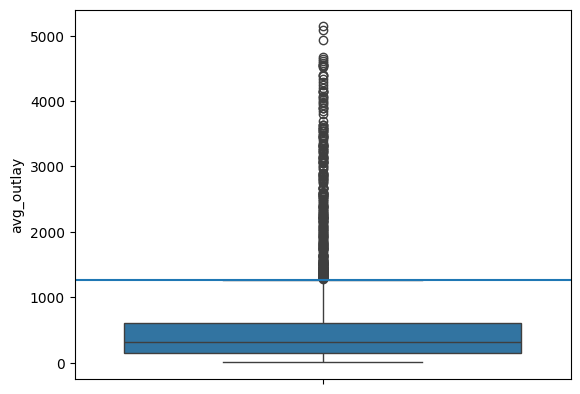

In [ ]:
ax = sns.boxplot(data=df,
            y=df['avg_outlay'])
ax.axhline(1270)

In [ ]:
# оценим процент возможных потерь
df[df['avg_outlay'] > 1270].shape[0]

327

In [ ]:
filt_avg_outlay = df.avg_outlay.between((df.avg_outlay).min(), np.percentile(df.avg_outlay.dropna(), 99))
filt_avg_outlay.sum()
df_new_avg_outlay = df.loc[filt_avg_outlay]
np.percentile(df.avg_outlay.dropna(), 99)
df_new_avg_outlay

,age,avg_outlay,avg_period,dcall_mnth,evcall_mnth,ncall_mnth,other_city,other_countries,fixed_phone,sms,date
1,51,287.51,1.7,111.0,109.0,1.0,44.0,0,6.0,1.0,2021-10-21 15:39:54
2,41,113.70,2.1,41.0,27.0,0.0,0.0,0,1.0,36.0,2015-03-26 11:26:15
3,35,410.23,5.6,47.0,49.0,0.0,0.0,0,11.0,23.0,2016-01-04 15:53:20
4,26,537.60,4.8,58.0,77.0,4.0,0.0,0,16.0,29.0,2017-05-03 13:33:53
5,26,324.56,3.3,45.0,75.0,3.0,1.0,1,8.0,15.0,2016-11-13 15:53:16
...,...,...,...,...,...,...,...,...,...,...,...
4487,40,186.20,3.7,36.0,28.0,2.0,6.0,0,12.0,30.0,2021-04-10 14:58:23
4488,40,500.68,6.0,46.0,66.0,0.0,6.0,0,15.0,23.0,2021-09-22 14:52:43
4489,60,470.42,3.5,58.0,129.0,2.0,4.0,0,19.0,5.0,2019-04-04 17:33:38
4490,38,858.99,9.3,50.0,74.0,0.0,0.0,0,28.0,69.0,2015-12-30 16:28:26


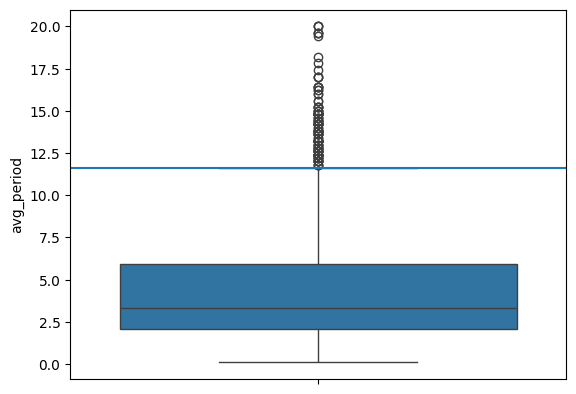

In [ ]:
ax = sns.boxplot(data=df,
            y=df.avg_period)
ax.axhline(11.6)

In [ ]:
# оценим процент возможных потерь
df[df.avg_period > 11.6].shape[0]

125

In [ ]:
filt_avg_period = df.avg_period.between((df.avg_period).min(), np.percentile(df.avg_period.dropna(), 99))
df_new_avg_period = df.loc[filt_avg_period]
np.percentile(df.avg_period.dropna(), 99)

14.452000000000044

In [ ]:
df_new_avg_period

,age,avg_outlay,avg_period,dcall_mnth,evcall_mnth,ncall_mnth,other_city,other_countries,fixed_phone,sms,date
0,24,NaN,2.4,12.0,65.0,5.0,0.0,0,5.0,56.0,2018-06-17 12:14:35
1,51,287.51,1.7,111.0,109.0,1.0,44.0,0,6.0,1.0,2021-10-21 15:39:54
2,41,113.70,2.1,41.0,27.0,0.0,0.0,0,1.0,36.0,2015-03-26 11:26:15
3,35,410.23,5.6,47.0,49.0,0.0,0.0,0,11.0,23.0,2016-01-04 15:53:20
4,26,537.60,4.8,58.0,77.0,4.0,0.0,0,16.0,29.0,2017-05-03 13:33:53
...,...,...,...,...,...,...,...,...,...,...,...
4487,40,186.20,3.7,36.0,28.0,2.0,6.0,0,12.0,30.0,2021-04-10 14:58:23
4488,40,500.68,6.0,46.0,66.0,0.0,6.0,0,15.0,23.0,2021-09-22 14:52:43
4489,60,470.42,3.5,58.0,129.0,2.0,4.0,0,19.0,5.0,2019-04-04 17:33:38
4490,38,858.99,9.3,50.0,74.0,0.0,0.0,0,28.0,69.0,2015-12-30 16:28:26


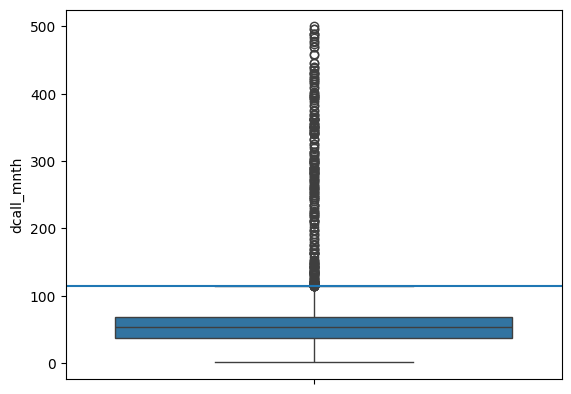

In [ ]:
ax = sns.boxplot(data=df,
            y=df.dcall_mnth)
ax.axhline(115)

In [ ]:
# оценим процент возможных потерь
df[df.dcall_mnth > 115].shape[0]

265

In [ ]:
filt_dcall_mnth = df.dcall_mnth.between((df.dcall_mnth).min(), np.percentile(df.dcall_mnth.dropna(), 99))
df_new_dcall_mnth = df.loc[filt_dcall_mnth]
np.percentile(df.dcall_mnth.dropna(), 99)

391.15999999999985

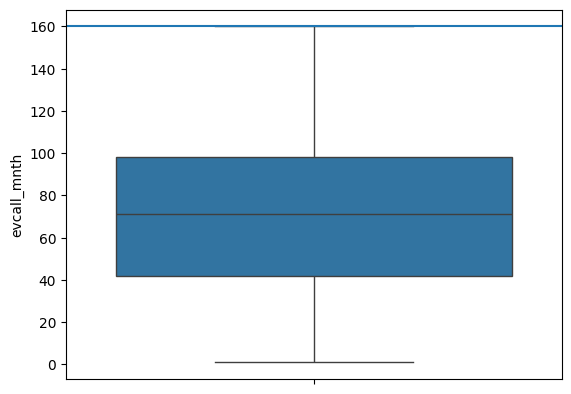

In [ ]:
ax = sns.boxplot(data=df,
            y=df.evcall_mnth)
ax.axhline(160)

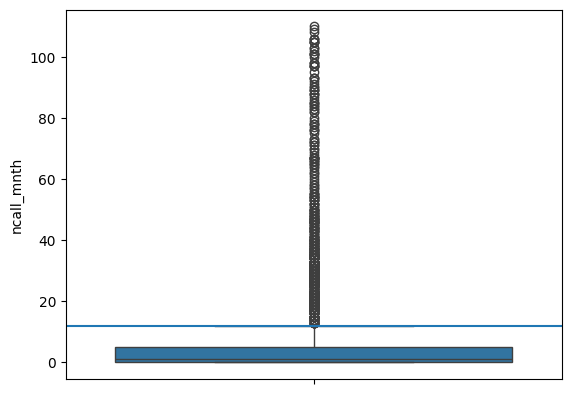

In [ ]:
ax = sns.boxplot(data=df,
            y=df.ncall_mnth)
ax.axhline(12)

In [ ]:
# оценим процент возможных потерь
df[df.ncall_mnth > 12].shape[0]

521

In [ ]:
filt_ncall_mnth = df.ncall_mnth.between((df.ncall_mnth).min(), np.percentile(df.ncall_mnth.dropna(), 99))
df_new_ncall_mnth = df.loc[filt_ncall_mnth]
np.percentile(df.ncall_mnth.dropna(), 99)

84.0

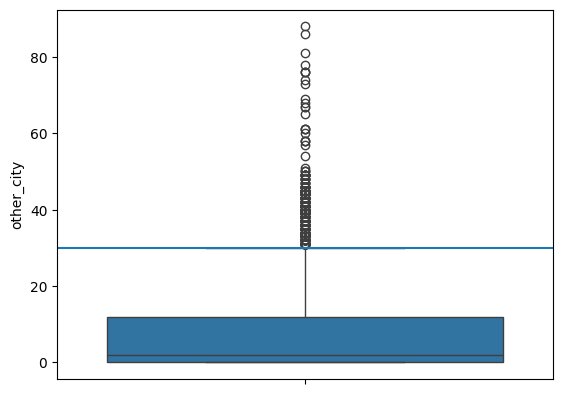

In [ ]:
ax = sns.boxplot(data=df,
            y=df.other_city)
ax.axhline(30)

In [ ]:
# оценим процент возможных потерь
df[df.other_city > 30].shape[0]

494

In [ ]:
filt_other_city = df.other_city.between((df.other_city).min(), np.percentile(df.other_city.dropna(), 99))
df_new_other_city = df.loc[filt_other_city]
np.percentile(df.other_city.dropna(), 99)

46.10999999999967

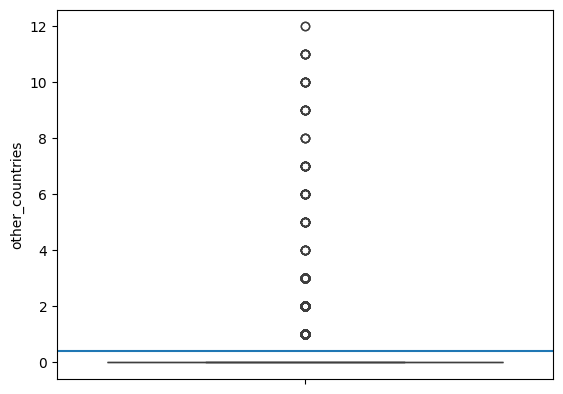

In [ ]:
ax = sns.boxplot(data=df,
            y=df.other_countries)
ax.axhline(0.4)

In [ ]:
filt_other_countries = df.other_countries.between((df.other_countries).min(), np.percentile(df.other_countries.dropna(), 99))
df_new_other_countries = df.loc[filt_other_countries]
np.percentile(df.other_countries.dropna(), 99)

6.0

In [ ]:
# оценим процент возможных потерь
df[df.other_countries > 6].shape[0]

43

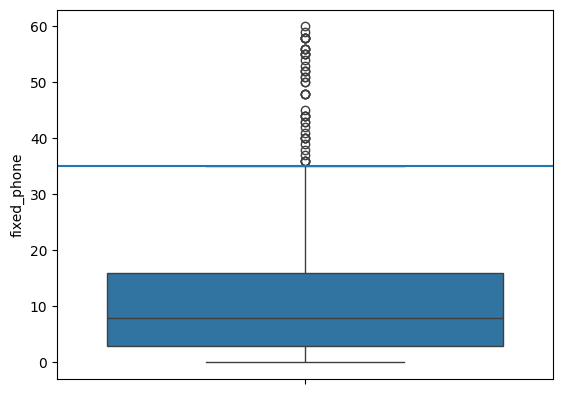

In [ ]:
ax = sns.boxplot(data=df,
            y=df.fixed_phone)
ax.axhline(35)

In [ ]:
# оценим процент возможных потерь
df[df.fixed_phone > 35].shape[0]

49

In [ ]:
filt_fixed_phone = df.fixed_phone.between((df.fixed_phone).min(), np.percentile(df.fixed_phone.dropna(), 99))
df_new_fixed_phone = df.loc[filt_fixed_phone]
np.percentile(df.fixed_phone.dropna(), 99)

36.100000000000364

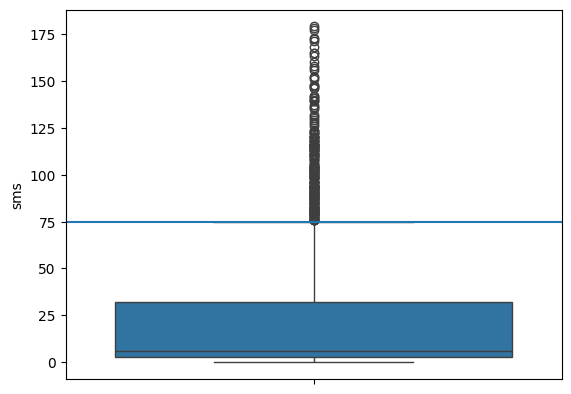

In [ ]:
ax = sns.boxplot(data=df,
            y=df.sms)
ax.axhline(75)

In [ ]:
# оценим процент возможных потерь
df[df.sms > 75].shape[0]

239

In [ ]:
filt_sms = df.sms.between((df.sms).min(), np.percentile(df.sms.dropna(), 99))
df_new_sms = df.loc[filt_sms]
np.percentile(df.sms.dropna(), 99)

122.0

In [ ]:
# некоторые выводы по пропущенным данным
len_df = df.shape[0]
avg_val = df[df.avg_outlay.notna()].shape[0]
call_avg_len = df[df.avg_period.notna()].shape[0]
call_dpm = df[df.dcall_mnth.notna()].shape[0]
call_epm = df[df.evcall_mnth.notna()].shape[0]
print(f"""Количество записей всего {len_df}
Среднемесячный расход {avg_val} пропущено {len_df-avg_val}, или {avg_val/len_df:.2%} заполнено
Средняя продолжительность разговоров {call_avg_len} пропущено {len_df-call_avg_len}, или {call_avg_len/len_df:.2%} заполнено
Звонков днем за месяц {call_dpm} пропущено {len_df-call_dpm}, или {call_dpm/len_df:.2%} заполнено
Звонков вечером за месяц {call_epm} пропущено {len_df-call_epm}, или {call_epm/len_df:.2%} заполнено
""")

Количество записей всего 4492
Среднемесячный расход 4468 пропущено 24, или 99.47% заполнено
Средняя продолжительность разговоров 4475 пропущено 17, или 99.62% заполнено
Звонков днем за месяц 4472 пропущено 20, или 99.55% заполнено
Звонков вечером за месяц 4489 пропущено 3, или 99.93% заполнено



In [ ]:
# создадим копию dataframe с неизмененными значениями
df_old = df.copy()
df_old.describe()

,age,avg_outlay,avg_period,dcall_mnth,evcall_mnth,ncall_mnth,other_city,other_countries,fixed_phone,sms,date
count,4492.000000,4468.000000,4475.000000,4472.000000,4489.000000,4491.000000,4490.000000,4492.000000,4491.000000,4491.000000,4492
mean,41.894924,505.533577,4.230827,63.899374,70.363778,6.272990,8.658575,0.394034,10.333556,21.245380,2018-07-10 01:04:50.785841664
min,19.000000,3.180000,0.100000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015-01-01 15:48:33
25%,31.000000,152.490000,2.100000,37.000000,42.000000,0.000000,0.000000,0.000000,3.000000,3.000000,2016-10-21 08:23:49.500000
50%,43.000000,315.510000,3.300000,53.000000,71.000000,1.000000,2.000000,0.000000,8.000000,6.000000,2018-06-21 16:56:24.500000
75%,52.000000,599.840000,5.900000,68.000000,98.000000,5.000000,12.000000,0.000000,16.000000,32.000000,2020-04-04 18:48:26.750000128
max,70.000000,5142.760000,20.000000,500.000000,160.000000,110.000000,88.000000,12.000000,60.000000,179.000000,2021-12-31 14:12:11
std,13.077254,646.354693,3.005210,62.877394,41.219909,14.714668,13.477005,1.171980,9.222882,27.914631,NaN


In [ ]:
# заполним пропущенные значения средними значениями
values = {"avg outlay": df.avg_outlay.mean(), "avg period": df.avg_period.mean(),\
          "dcall mnth": df.dcall_mnth.mean(), "evcall mnth": df.evcall_mnth.mean()}
df.fillna(value=values, inplace=True)
# Проверяем наличие пропусков
df.describe()

,age,avg_outlay,avg_period,dcall_mnth,evcall_mnth,ncall_mnth,other_city,other_countries,fixed_phone,sms,date
count,4492.000000,4468.000000,4475.000000,4472.000000,4489.000000,4491.000000,4490.000000,4492.000000,4491.000000,4491.000000,4492
mean,41.894924,505.533577,4.230827,63.899374,70.363778,6.272990,8.658575,0.394034,10.333556,21.245380,2018-07-10 01:04:50.785841664
min,19.000000,3.180000,0.100000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015-01-01 15:48:33
25%,31.000000,152.490000,2.100000,37.000000,42.000000,0.000000,0.000000,0.000000,3.000000,3.000000,2016-10-21 08:23:49.500000
50%,43.000000,315.510000,3.300000,53.000000,71.000000,1.000000,2.000000,0.000000,8.000000,6.000000,2018-06-21 16:56:24.500000
75%,52.000000,599.840000,5.900000,68.000000,98.000000,5.000000,12.000000,0.000000,16.000000,32.000000,2020-04-04 18:48:26.750000128
max,70.000000,5142.760000,20.000000,500.000000,160.000000,110.000000,88.000000,12.000000,60.000000,179.000000,2021-12-31 14:12:11
std,13.077254,646.354693,3.005210,62.877394,41.219909,14.714668,13.477005,1.171980,9.222882,27.914631,NaN


In [ ]:
df_new = df.loc[filt_avg_outlay  & filt_avg_period & filt_dcall_mnth & filt_ncall_mnth
                & filt_other_city & filt_other_countries & filt_fixed_phone & filt_sms]

df_new

,age,avg_outlay,avg_period,dcall_mnth,evcall_mnth,ncall_mnth,other_city,other_countries,fixed_phone,sms,date
1,51,287.51,1.7,111.0,109.0,1.0,44.0,0,6.0,1.0,2021-10-21 15:39:54
2,41,113.70,2.1,41.0,27.0,0.0,0.0,0,1.0,36.0,2015-03-26 11:26:15
3,35,410.23,5.6,47.0,49.0,0.0,0.0,0,11.0,23.0,2016-01-04 15:53:20
4,26,537.60,4.8,58.0,77.0,4.0,0.0,0,16.0,29.0,2017-05-03 13:33:53
5,26,324.56,3.3,45.0,75.0,3.0,1.0,1,8.0,15.0,2016-11-13 15:53:16
...,...,...,...,...,...,...,...,...,...,...,...
4487,40,186.20,3.7,36.0,28.0,2.0,6.0,0,12.0,30.0,2021-04-10 14:58:23
4488,40,500.68,6.0,46.0,66.0,0.0,6.0,0,15.0,23.0,2021-09-22 14:52:43
4489,60,470.42,3.5,58.0,129.0,2.0,4.0,0,19.0,5.0,2019-04-04 17:33:38
4490,38,858.99,9.3,50.0,74.0,0.0,0.0,0,28.0,69.0,2015-12-30 16:28:26


In [ ]:
df_new.describe()

,age,avg_outlay,avg_period,dcall_mnth,evcall_mnth,ncall_mnth,other_city,other_countries,fixed_phone,sms,date
count,4182.000000,4182.000000,4182.000000,4182.000000,4179.000000,4182.000000,4182.000000,4182.000000,4182.000000,4182.000000,4182
mean,42.056193,399.699840,3.857401,54.154232,68.083274,4.307747,7.673601,0.279770,9.764228,19.580583,2018-07-07 22:59:12.565757952
min,19.000000,3.180000,0.100000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015-01-01 15:48:33
25%,31.000000,142.850000,2.000000,36.000000,40.000000,0.000000,0.000000,0.000000,3.000000,3.000000,2016-10-21 20:02:00.500000
50%,43.000000,296.650000,3.100000,52.000000,68.000000,1.000000,1.000000,0.000000,8.000000,5.000000,2018-06-18 11:42:00.500000
75%,52.750000,538.110000,5.400000,66.000000,95.000000,4.000000,9.000000,0.000000,15.000000,31.000000,2020-04-04 16:01:56.500000
max,70.000000,3543.540000,14.400000,383.000000,160.000000,84.000000,46.000000,6.000000,36.000000,122.000000,2021-12-31 14:12:11
std,13.128564,398.263447,2.493861,37.598572,40.939876,10.192373,12.227958,0.720538,8.232212,24.486276,NaN


In [ ]:
#по значениям признака Возраст введите новую переменную Возрастная категория, принимающую значения "студент", "аспирант", "бизнесмен" и "знаток"
def f(cat):
  if cat['age'] <= 24:
    return 'студент'
  elif cat['age'] <= 33:
    return 'аспирант'
  elif cat['age'] <= 56:
    return 'бизнесмен'
  else:
    return 'знаток'

df['age_cat'] = df.apply(f, axis=1)
df.head()

,age,avg_outlay,avg_period,dcall_mnth,evcall_mnth,ncall_mnth,other_city,other_countries,fixed_phone,sms,date,age_cat
0,24,NaN,2.4,12.0,65.0,5.0,0.0,0,5.0,56.0,2018-06-17 12:14:35,студент
1,51,287.51,1.7,111.0,109.0,1.0,44.0,0,6.0,1.0,2021-10-21 15:39:54,бизнесмен
2,41,113.70,2.1,41.0,27.0,0.0,0.0,0,1.0,36.0,2015-03-26 11:26:15,бизнесмен
3,35,410.23,5.6,47.0,49.0,0.0,0.0,0,11.0,23.0,2016-01-04 15:53:20,бизнесмен
4,26,537.60,4.8,58.0,77.0,4.0,0.0,0,16.0,29.0,2017-05-03 13:33:53,аспирант


In [ ]:
#в разрезе значений признаков Год подключения, Месяц подключения, Дата подключения
df['year']= df['date'].dt.year
df['month']= df['date'].dt.month
df['day'] = df['date'].dt.day_of_week
df.head(5)

,age,avg_outlay,avg_period,dcall_mnth,evcall_mnth,ncall_mnth,other_city,other_countries,fixed_phone,sms,date,age_cat,year,month,day
0,24,NaN,2.4,12.0,65.0,5.0,0.0,0,5.0,56.0,2018-06-17 12:14:35,студент,2018,6,6
1,51,287.51,1.7,111.0,109.0,1.0,44.0,0,6.0,1.0,2021-10-21 15:39:54,бизнесмен,2021,10,3
2,41,113.70,2.1,41.0,27.0,0.0,0.0,0,1.0,36.0,2015-03-26 11:26:15,бизнесмен,2015,3,3
3,35,410.23,5.6,47.0,49.0,0.0,0.0,0,11.0,23.0,2016-01-04 15:53:20,бизнесмен,2016,1,0
4,26,537.60,4.8,58.0,77.0,4.0,0.0,0,16.0,29.0,2017-05-03 13:33:53,аспирант,2017,5,2


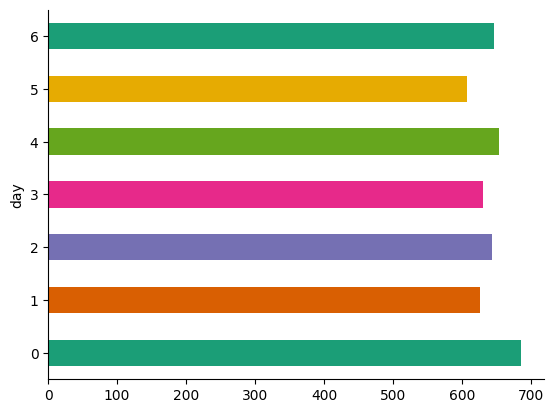

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('day').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

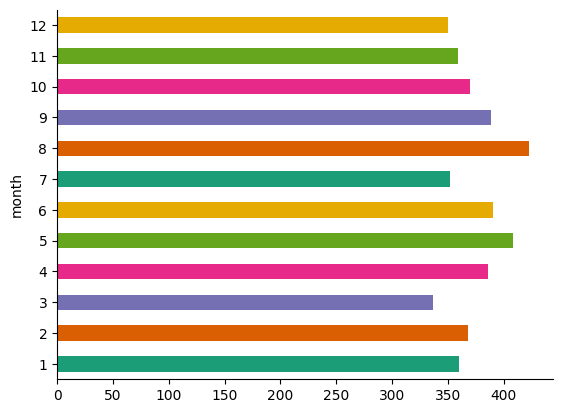

In [ ]:
df.groupby('month').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

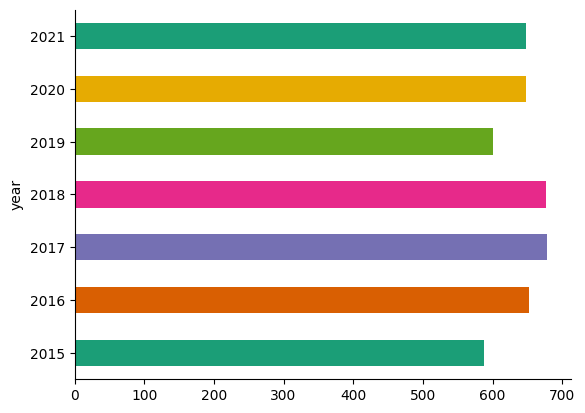

In [ ]:
df.groupby('year').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Активность подключения по годам держится примерно на одном уровне. Максимальное количество подключилось в 2017-2018гг, минимальное в 2015г. Большинство клиентов подключалось в августе, возможно это связано с периодом отпусков у клиентов, временем отдыха. Минимум в марте и июле. Большинство клиентов подключается в понедельник, активность подключения держится примерно на одном уровне всю рабочую неделю и падает в субботу. В выходные клиенты не заинтересованы в подключении тарифа.

In [ ]:
df.groupby(['age_cat'])[['avg_outlay', 'avg_period', 'dcall_mnth', 'evcall_mnth', 'ncall_mnth', 'other_city', 'fixed_phone', 'sms']].median()

,avg_outlay,avg_period,dcall_mnth,evcall_mnth,ncall_mnth,other_city,fixed_phone,sms
age_cat,,,,,,,,
аспирант,464.765,4.4,63.0,85.0,3.0,5.0,10.0,29.0
бизнесмен,339.200,3.4,55.0,70.0,0.0,3.0,10.0,5.0
знаток,222.950,2.8,44.0,51.0,0.0,0.0,8.0,3.0
студент,137.175,2.4,35.0,70.0,7.0,0.0,3.0,41.0


In [ ]:
df.groupby(['age_cat'])[['avg_outlay', 'avg_period', 'dcall_mnth', 'evcall_mnth', 'ncall_mnth', 'other_city', 'fixed_phone', 'sms']].mean()

,avg_outlay,avg_period,dcall_mnth,evcall_mnth,ncall_mnth,other_city,fixed_phone,sms
age_cat,,,,,,,,
аспирант,702.398216,5.380338,80.385732,85.510229,14.439230,11.202166,11.265945,38.932611
бизнесмен,514.017155,4.269397,65.623534,69.901653,3.888799,9.869863,11.253425,14.618204
знаток,441.342549,3.722527,56.638298,54.219697,2.081694,6.836611,10.644478,2.724242
студент,231.452840,2.849130,38.373541,68.845261,9.951644,1.069767,4.021277,48.288201


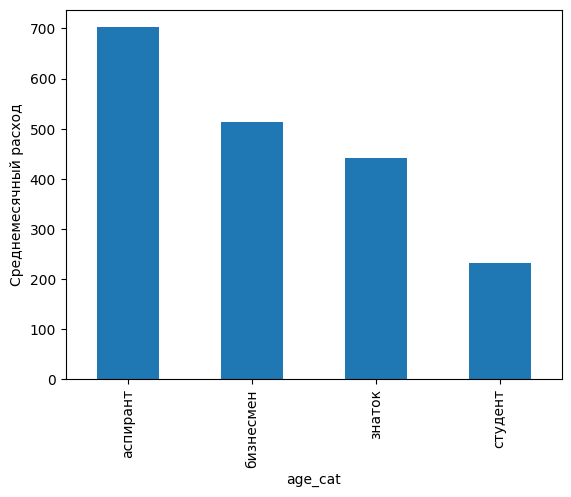

In [ ]:
df.groupby('age_cat')['avg_outlay'].mean().plot(kind='bar')
plt.ylabel('Среднемесячный расход')
plt.show();

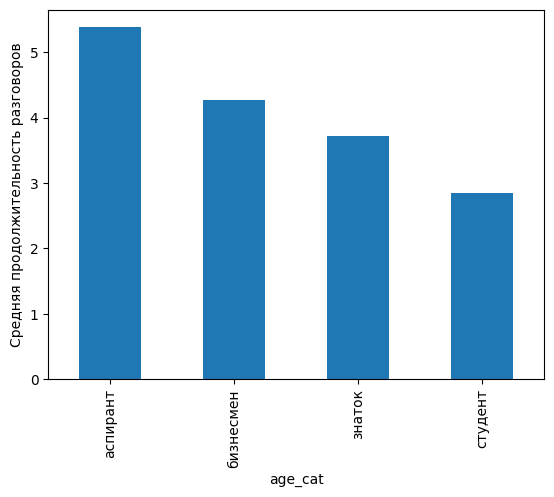

In [ ]:
df.groupby('age_cat')['avg_period'].mean().plot(kind='bar')
plt.ylabel('Средняя продолжительность разговоров')
plt.show();

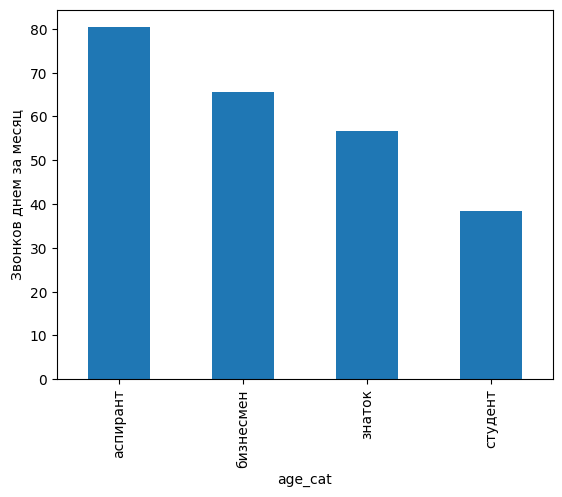

In [ ]:
df.groupby('age_cat')['dcall_mnth'].mean().plot(kind='bar')
plt.ylabel('Звонков днем за месяц')
plt.show();

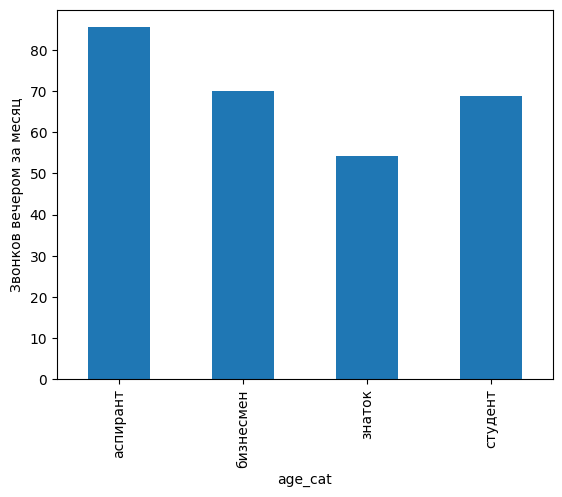

In [ ]:
df.groupby('age_cat')['evcall_mnth'].mean().plot(kind='bar')
plt.ylabel('Звонков вечером за месяц')
plt.show();

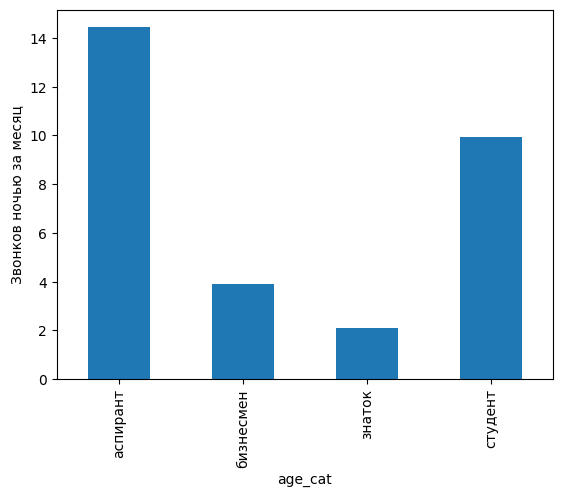

In [ ]:
df.groupby('age_cat')['ncall_mnth'].mean().plot(kind='bar')
plt.ylabel('Звонков ночью за месяц')
plt.show();

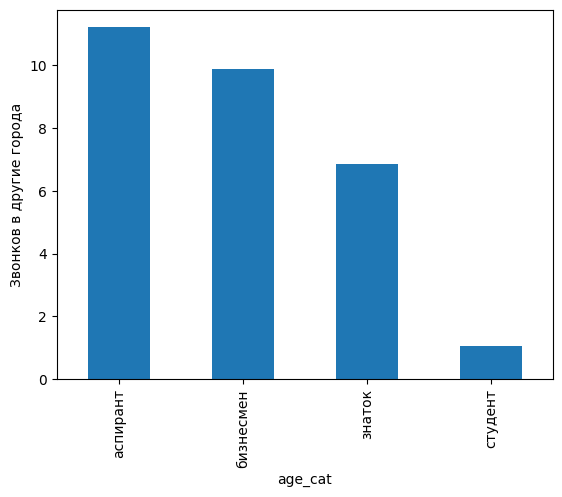

In [ ]:
df.groupby('age_cat')['other_city'].mean().plot(kind='bar')
plt.ylabel('Звонков в другие города')
plt.show();

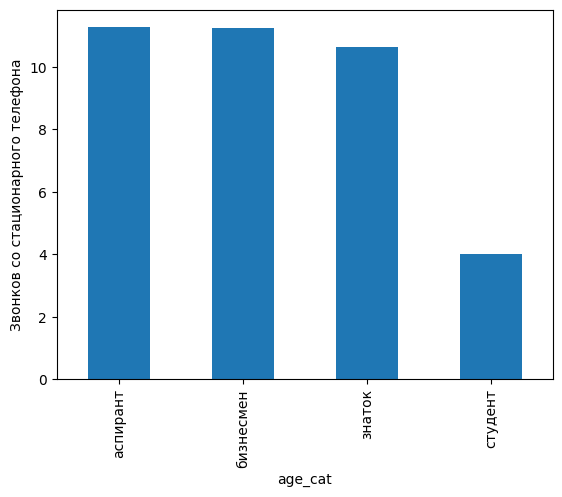

In [ ]:
df.groupby('age_cat')['fixed_phone'].mean().plot(kind='bar')
plt.ylabel('Звонков со стационарного телефона')
plt.show();

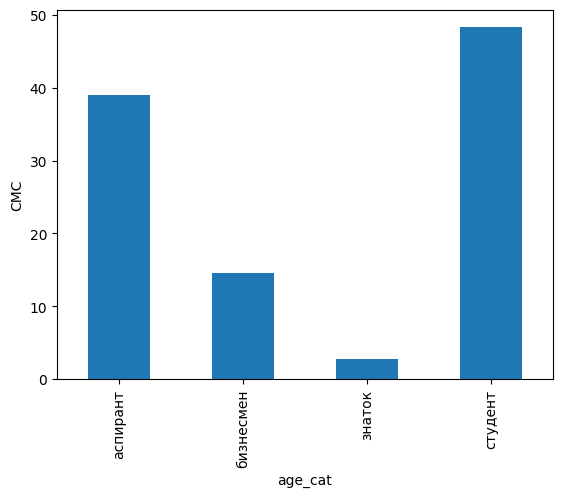

In [ ]:
df.groupby('age_cat')['sms'].mean().plot(kind='bar')
plt.ylabel('СМС')
plt.show();

Выводы:

Cреди всех групп, по звонкам вечером, днем и ночью, на стационарные телефоны и в др. страны возрастная группа Аспирантов совершает больше всего звонков. Студенты чаще всех отправляют смс в месяц, но меньше всего звонков у них на стационарные телефоны и в др. города и страны, где лидируют Аспиранты и Бизнесмены. Ночью и вечером Студенты, после Аспирантов, совершают больше звонков. Вторая лидирующая группа это Бизнесмены, кроме звонков вечером и ночью. Группа Знатоков меньше всего отправляют смс, предположительно ввиду отсутствия навыков и делают меньше звонков ночью.

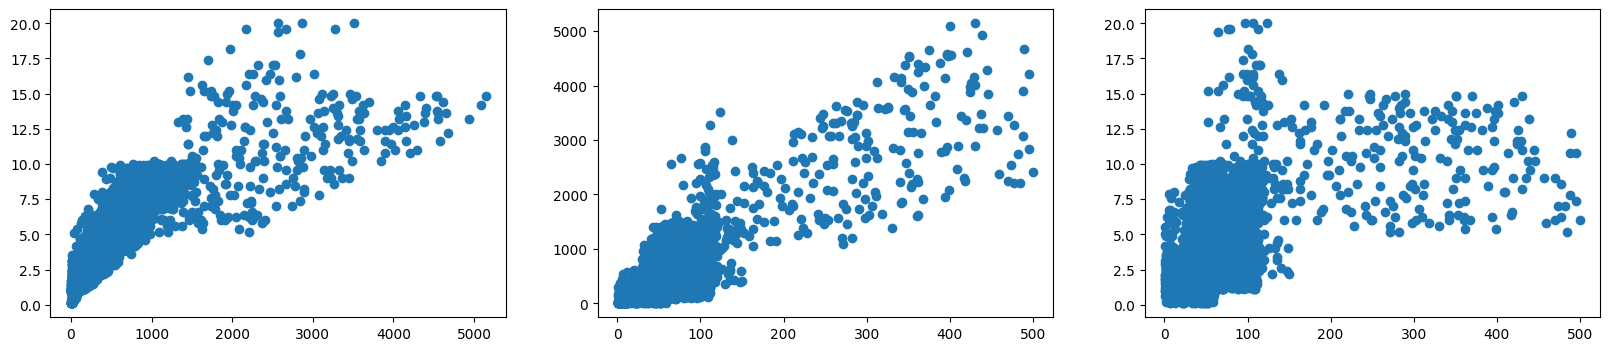

In [ ]:
fig, ax = plt.subplots(1,3, figsize = (20,4))
plt.subplot(131)
plt.scatter (df.avg_outlay, df.avg_period)

plt.subplot(132)
plt.scatter (df.dcall_mnth, df.avg_outlay)

plt.subplot(133)
plt.scatter (df.dcall_mnth, df.avg_period)

plt.show()

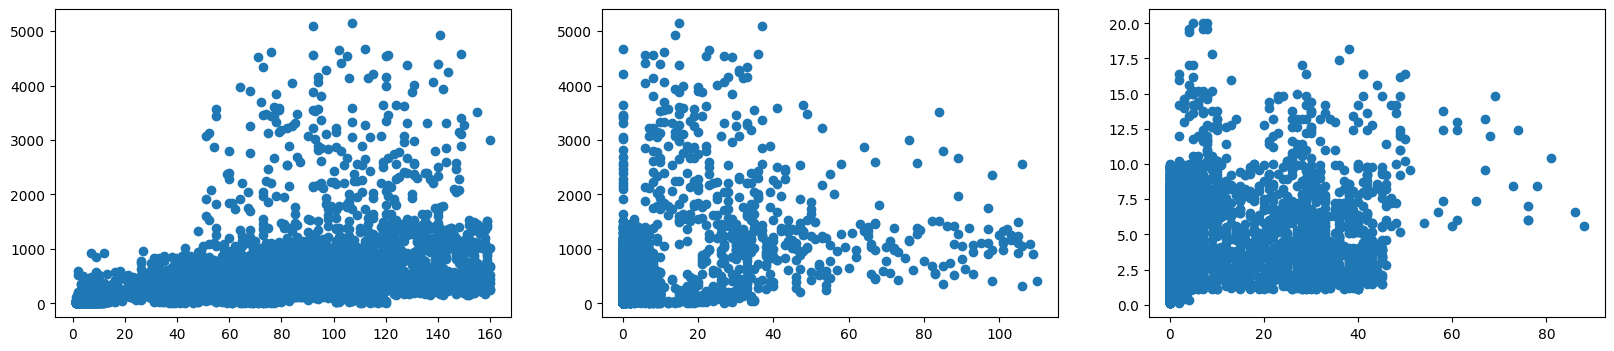

In [ ]:
fig, ax = plt.subplots(1,3, figsize = (20,4))
plt.subplot(131)
plt.scatter (df.evcall_mnth, df.avg_outlay)

plt.subplot(132)
plt.scatter (df.ncall_mnth, df.avg_outlay)

plt.subplot(133)
plt.scatter (df.other_city, df.avg_period)

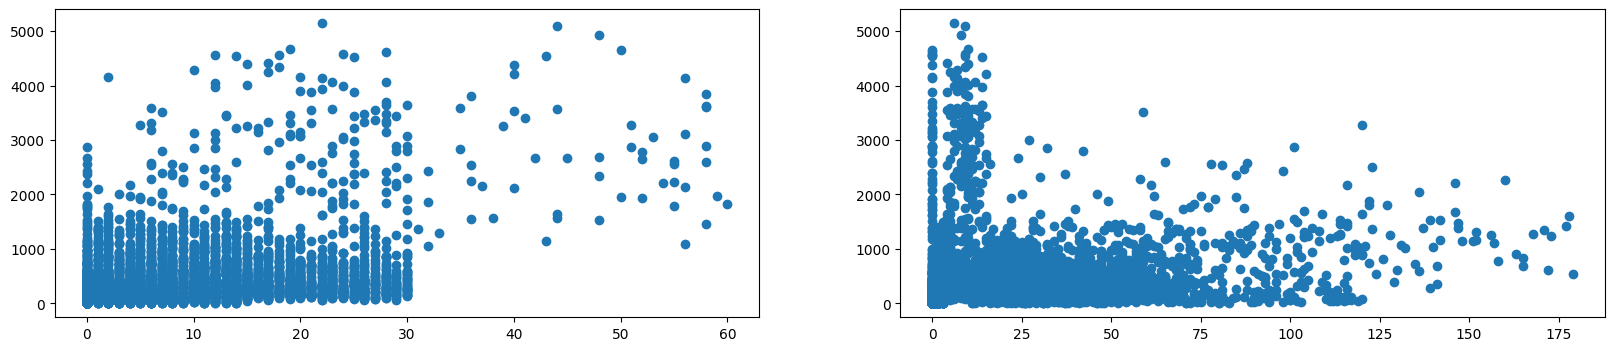

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (20,4))
plt.subplot(121)
plt.scatter (df.fixed_phone, df.avg_outlay)

plt.subplot(122)
plt.scatter (df.sms, df.avg_outlay)

In [ ]:
corr = df1.corr().round(3)
corr.style.background_gradient(cmap='RdYlGn')

NameError: name 'df1' is not defined

Корреляционная матрица показывает некую выраженную зависимость по коэффициенту = 0.830000	 между продолжительностью разговоров и среднемесячными расходами.

Заключение:
После проведения анализа можно сделать следующие выводы о предпочтениях клиентов разных возрастных категорий в отношении используемых услуг:

- В процессе разделения нами клиентов на 4-е возрастные группы Студент, Аспирант, Бизнесмен и Знаток, а также по группировке совершенных ими звонков по году, месяцу, дню, мы заметили, что в разрезе признака Год подключения по количеству клиентов, подключение в период с 2015-2021г в среднем приблизительно одинаковое, кроме 2017г., где подключалось больше всего клиентов,а в 2015 подключалось меньше всего клиентов;
- В разрезе признака Месяц подключения, больше всего клиентов подключалось в августе, меньше - в марте. Возможно месяц максимального подключения клиентов связан с проведением акций в конце летнего периода;
- Сгруппировав по Возрастной категории кол-во звонков в разное время, города, страны, мы увидели что, по количеству звонков вечером, днем и ночью, на стационарные телефоны и в др. страны, Аспиранты совершают звонки чаще остальных. Студенты больше всех отправляют смс в месяц, но меньше всего звонков совершают на стационарные телефоны и в др. города и страны, где Аспиранты и Бизнесмены лидируют. Ночью и вечером Студенты после Аспирантов совершают больше звонков. Вторая лидирующая группа это Бизнесмены, кроме количества совершенных ими звонков вечером и ночью. Группа знатоков меньше всего отправляют смс,предположительно ввиду отсутствия навыков и делают меньше звонков ночью;
- По расходам, кол-ву звонков и времени, в разрезе признака Возрастная категория, исследовав средний показатель, мы увидели, что больше всего в среднем в месяц тратят на оплату услуг связи - Аспирант и Бизнесмен, а так же совершают больше звонков и тратят больше времени общения днем, вечером и ночью. Меньше всего времени на общение в месяц, днем и вечером тратят клиенты возрастной категории - Знаток, по расходам на услуги и продолжительности разговоров -Студент.

Предложение - Для групп Студент и Знаток, которые отстают по расходам на услуги и времени на общения - провести различные спецакции, установить спецтарифы с целью вовлечения и удержания аудитории.

In [ ]:
import pandas as pd
from scipy.stats import shapiro
from scipy.stats import kstest
from scipy.stats import mannwhitneyu

In [ ]:
print(df[(df.anomaly==False) & (df.status=="студент")]['sms_za_mesjats'].mean(),
      df[(df.anomaly==False) & (df.status=="аспирант")]['sms_za_mesjats'].mean())